In [ ]:
# The MIT License (MIT)
#
# Copyright © 2021 Fridtjof Gjengset, Adele Zaini, Gaute Holen
#
# Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated
# documentation files (the “Software”), to deal in the Software without restriction, including without limitation the
# rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software,
# and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all copies or substantial portions of
# the Software. THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT
# LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT
# SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF
# CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS
# IN THE SOFTWARE.

import numpy as np
from random import random, seed
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


# FrankeFunction: a two-variables function to create the dataset of our vanilla problem
def FrankeFunction(x,y): #code from task
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4
 
# 3D plot of FrankeFunction
def Plot_FrankeFunction(x,y,z, title="Dataset"): #code from task
    fig = plt.figure()
    ax = fig.gca(projection="3d")

    # Plot the surface.
    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(title)
    plt.show()

# Error analysis: MSE and R2 score
def R2(y_data, y_model): #week 35 exercise
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# SVD theorem
def SVD(A): #week35 SVD change to week 36
    U, S, VT = np.linalg.svd(A,full_matrices=True)
    D = np.zeros((len(U),len(VT)))
    print("shape D= ", np.shape(D))
    print("Shape S= ",np.shape(S))
    print("lenVT =",len(VT))
    print("lenU =",len(U))
    D = np.eye(len(U),len(VT))*S
    """
    for i in range(0,VT.shape[0]): #was len(VT)
        D[i,i]=S[i]
        print("i=",i)"""
    return U @ D @ VT

# Design matrix
def create_X(x, y, n): # week 35-36 lecture slides
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta, number of feutures (order-degree of polynomial)
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X
  
# Splitting and rescaling data (rescaling is optional)
# Default values: 20% of test data and the scaler is StandardScaler without std.dev.
def Split_and_Scale(X,z,test_size=0.2, scale=True):

    #Splitting training and test data
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=test_size)

    # Rescaling X and z (optional)
    if scale==True:
        scaler_X = StandardScaler(with_std=False)
        scaler_X.fit(X_train)
        X_train = scaler_X.transform(X_train)
        X_test = scaler_X.transform(X_test)

        scaler_z = StandardScaler(with_std=False)
        z_train = np.squeeze(scaler_z.fit_transform(z_train.reshape(-1, 1)))
        z_test = np.squeeze(scaler_z.transform(z_test.reshape(-1, 1)))
      
    return X_train, X_test, z_train, z_test

# OLS equation
def OLS_solver(X_train, X_test, z_train, z_test):

	# Calculating Beta Ordinary Least Square with matrix inversion
	ols_beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train #psudoinverse
  
	z_tilde = X_train @ ols_beta
	z_predict = X_test @ ols_beta

	#beta_ols_variance = z_sigma**2 @ np.linalg.pinv(X_train.T @ X_train) #Agree correct?
	return ols_beta, z_tilde, z_predict


In [ ]:
degree=5

# Create vanilla dataset:
np.random.seed(9)

n = 1000

x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
print(x[1:10])
print(y[1:10])
x, y = np.meshgrid(x,y)

sigma_N = 0.1; mu_N = 0 #change for value of sigma_N to appropriate values
z = FrankeFunction(x,y) +mu_N+sigma_N*np.random.randn(n,n)#+ np.random.normal(mu_N,sigma_N,n**2)	#adding noise to the dataset

print(z.shape)
Plot_FrankeFunction(x,y,z)

print(z)
# OLS
X = create_X(x, y, degree)
print("X", X.shape)
z=np.ravel(z)
X_train, X_test, z_train, z_test = Split_and_Scale(X,z) #StardardScaler, test_size=0.2, scale=true
print(z_test.shape)
print(z_train.shape)
ols_beta, z_tilde,z_predict = OLS_solver(X_train, X_test, z_train, z_test)


print("Training MSE", MSE(z_train,z_tilde))
print("Test MSE", MSE(z_test,z_predict))
print("-------------------------------------")
print("Training R2", R2(z_train,z_tilde))
print("Test R2", R2(z_test,z_predict))

In [ ]:
import pandas as pd
degree=5

# Create vanilla dataset:
np.random.seed(3155)

n = 1000

x = np.linspace(0,1,n)
y = np.linspace(0,1,n) 
x, y = np.meshgrid(x,y)

sigma_N = 0.1; mu_N = 0 #change for value of sigma_N to appropriate values
z = FrankeFunction(x,y) +mu_N+sigma_N*np.random.randn(n,n)#+ np.random.normal(mu_N,sigma_N,n**2)  #adding noise to the dataset

Plot_FrankeFunction(x,y,z, title="Noisy dataset")

# OLS
X = create_X(x, y, degree)
X=pd.DataFrame(X)
display(X)
X_train, X_test, z_train, z_test = Split_and_Scale(X,np.ravel(z)) #StardardScaler, test_size=0.2, scale=true
ols_beta, z_tilde,z_predict = OLS_solver(X_train, X_test, z_train, z_test)
print(z_test)
print(ols_beta)
ols_beta=pd.DataFrame(ols_beta)
display(ols_beta)

print("Training MSE", MSE(z_train,z_tilde))
print("Test MSE", MSE(z_test,z_predict))
print("-------------------------------------")
print("Training R2", R2(z_train,z_tilde))
print("Test R2", R2(z_test,z_predict))

In [ ]:
import numpy as np
import pandas as pd
import sklearn.linear_model as skl
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

np.random.seed(2204)

## part a
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def Design_Matrix_X(x, y, n):
	N = len(x)
	l = int((n+1)*(n+2)/2)		
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = x**(i-k) * y**k

	return X

n_x=1000
m=5

x = np.random.uniform(0, 1, n_x)
y = np.random.uniform(0, 1, n_x)

z = FrankeFunction(x, y)

#print(x)

n = int(len(x))
z_1 = z +0.01*np.random.randn(n)

X= Design_Matrix_X(x,y,n=m)
DesignMatrix = pd.DataFrame(X)
#print(DesignMatrix)

a = np.linalg.matrix_rank(X) #we check it is not a singular matrix
print(a)

beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(z_1)
ztilde = X @ beta
#print(beta)

beta1 = skl.LinearRegression().fit(X,z_1) #function .fit fits linear models
ztilde1 = beta1.predict(X)

#print(ztilde)
#print('--')
#print(ztilde1)

var_beta_OLS = 1*np.linalg.inv(X.T.dot(X))
#print(var_beta_OLS)
var = pd.DataFrame(var_beta_OLS)
#print(var)
var_diag=np.diag(var_beta_OLS)
#print(var_diag)

l1_OLS = beta - 1.96*np.sqrt(var_diag)/(X.shape[0])
l2_OLS = beta + 1.96*np.sqrt(var_diag)/(X.shape[0])
print(l1_OLS)
print(l2_OLS)

def MSE (ydata, ymodel):
    n = np.size(ymodel)
    y = (ydata - ymodel).T@(ydata - ymodel)
    y = y/n
    return y

def R2 (ydata, ymodel):
    return 1-((ydata-ymodel).T@(ydata-ymodel))/((ydata-np.mean(ydata)).T@(ydata-np.mean(ydata)))


print(MSE(z_1,ztilde))
print(R2(z_1,ztilde))


print("Mean squared error: %.2f" % mean_squared_error(z_1, ztilde))
print('Variance score: %.2f' % r2_score(z_1, ztilde))

In [ ]:
import numpy as np
from random import random, seed
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


# FrankeFunction: a two-variables function to create the dataset of our vanilla problem
def FrankeFunction(x,y): #code from task
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4
 
# 3D plot of FrankeFunction
def Plot_FrankeFunction(): #code from task
  fig = plt.figure()
  ax = fig.gca(projection="3d")

  # Make data.
  x = np.arange(0, 1, 0.05)
  y = np.arange(0, 1, 0.05)
  x, y = np.meshgrid(x,y)
  z = FrankeFunction(x, y)

  # Plot the surface.
  surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
  linewidth=0, antialiased=False)

  # Customize the z axis.
  ax.set_zlim(-0.10, 1.40)
  ax.zaxis.set_major_locator(LinearLocator(10))
  ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.5, aspect=5)
  plt.show()

# Error analysis: MSE and R2 score
def R2(y_data, y_model): #week 35 exercise
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# SVD theorem
def SVD(A): #week35 SVD change to week 36
    U, S, VT = np.linalg.svd(A,full_matrices=True)
    D = np.zeros((len(U),len(VT)))
    print("shape D= ", np.shape(D))
    print("Shape S= ",np.shape(S))
    print("lenVT =",len(VT))
    print("lenU =",len(U))
    D = np.eye(len(U),len(VT))*S
    """
    for i in range(0,VT.shape[0]): #was len(VT)
        D[i,i]=S[i]
        print("i=",i)"""
    return U @ D @ VT

# Design matrix
def create_X(x, y, n): # week 35-36 lecture slides
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta, number of feutures (order-degree of polynomial)
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X
  
# Splitting and rescaling data (rescaling is optional)
# Default values: 20% of test data and the scaler is StandardScaler without std.dev.
def Split_and_Scale(X,z,test_size=0.2, scale=True):

    #Splitting training and test data
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=test_size)

    # Rescaling X and z (optional)
    if scale==True:
        scaler_X = StandardScaler(with_std=False)
        scaler_X.fit(X_train)
        X_train = scaler_X.transform(X_train)
        X_test = scaler_X.transform(X_test)

        scaler_z = StandardScaler(with_std=False)
        z_train = np.squeeze(scaler_z.fit_transform(z_train.reshape(-1, 1)))
        z_test = np.squeeze(scaler_z.transform(z_test.reshape(-1, 1)))
      
    return X_train, X_test, z_train, z_test

# OLS equation
def OLS_solver(X_train, X_test, z_train, z_test):

	# Calculating Beta Ordinary Least Square with matrix inversion
	ols_beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train #psudoinverse
  
	z_tilde = X_train @ ols_beta
	z_predict = X_test @ ols_beta

	#beta_ols_variance = z_sigma**2 @ np.linalg.pinv(X_train.T @ X_train) #Agree correct?
	return ols_beta, z_tilde, z_predict

def plot_ols_complexity(x, y, z, complexity = range(2,20)):

    MSE_train_set = []
    MSE_test_set = []

    for degree in complexity:

        X = create_X(x, y, degree)
        X_train, X_test, z_train, z_test = Split_and_Scale(X,np.ravel(z)) #StardardScaler, test_size=0.2, scale=true
        ols_beta, z_tilde,z_predict = OLS_solver(X_train, X_test, z_train, z_test)

        MSE_train_set.append(MSE(z_train,z_tilde))
        MSE_test_set.append(MSE(z_test,z_predict))

    plt.plot(complexity,MSE_train_set, label ="train")  
    plt.plot(complexity,MSE_test_set, label ="test")  
     

    plt.xlabel("complexity")
    plt.ylabel("MSE")
    plt.title("Plot of the MSE as a function of complexity of the model")
    plt.legend()
    plt.grid()     
    #plt.savefig('Task2plot(n='+str(n)+').pdf')
    plt.show() 



In [ ]:
# The MIT License (MIT)
#
# Copyright © 2021 Fridtjof Gjengset, Adele Zaini, Gaute Holen
#
# Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated
# documentation files (the “Software”), to deal in the Software without restriction, including without limitation the
# rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software,
# and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all copies or substantial portions of
# the Software. THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT
# LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT
# SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF
# CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS
# IN THE SOFTWARE.

import numpy as np
from random import random, seed
import pandas as pd
#from linear_regression import FrankeFunction, create_X, Split_and_Scale, OLS_solver, MSE, R2

degree=5

# Create vanilla dataset:
np.random.seed(3155)

n = 25

x = np.linspace(0,1,n)
y = np.linspace(0,1,n) 
x, y = np.meshgrid(x,y)

sigma_N = 0.01; mu_N = 0 #change for value of sigma_N to appropriate values
z = FrankeFunction(x,y) +mu_N+sigma_N*np.random.randn(n,n)#+ np.random.normal(mu_N,sigma_N,n**2)  #adding noise to the dataset

Plot_FrankeFunction(x,y,z, title="Noisy dataset")

# OLS
X = create_X(x, y, degree)
X_train, X_test, z_train, z_test = Split_and_Scale(X,np.ravel(z)) #StardardScaler, test_size=0.2, scale=true
ols_beta, z_tilde,z_predict = OLS_solver(X_train, X_test, z_train, z_test)

# Error Analysis
prec=4
print("––––––––––––––––––––––––––––––––––––––––––––")
print("Train MSE:", np.round(MSE(z_train,z_tilde),prec))
print("Test MSE:", np.round(MSE(z_test,z_predict),prec))
print("––––––––––––––––––––––––––––––––––––––––––––")
print("Train R2:", np.round(R2(z_train,z_tilde),prec))
print("Test R2:", np.round(R2(z_test,z_predict),prec))
print("––––––––––––––––––––––––––––––––––––––––––––")

# Confidence interval
beta_ols_variance = sigma_N**2 * np.linalg.pinv(X_train.T @ X_train) #Calculates variance of beta
var_diag=np.diag(beta_ols_variance)
ci1 = ols_beta - 1.96 * np.sqrt(var_diag)/(X.shape[0])
ci2 = ols_beta + 1.96 * np.sqrt(var_diag)/(X.shape[0])
print('Confidence interval of β-estimator at 95 %:')
ci_df = {r'$β_{-}$': ci1,
         r'$β_{ols}$': ols_beta,
         r'$β_{+}$': ci2}
ci_df = pd.DataFrame(ci_df)
display(np.round(ci_df,3))#prec
print("––––––––––––––––––––––––––––––––––––––––––––")

In [ ]:
import numpy as np
from random import random, seed
#from linear_regression import FrankeFunction, create_X, Split_and_Scale, OLS_solver, MSE, R2, plot_ols_compelxity


# Create vanilla dataset:
np.random.seed(1234)

n = 25

x = np.linspace(0,1,n)
y = np.linspace(0,1,n) 

x,y = np.meshgrid(x,y)
sigma_N = 0.1; mu_N = 0 #change for value of sigma_N to appropriate values
z = FrankeFunction(x,y) +mu_N +sigma_N*np.random.randn(n,n)	#adding noise to the dataset

complexity=range(2,20)

plot_ols_complexity(x,y,z, complexity)


In [ ]:
# The MIT License (MIT)
#
# Copyright © 2021 Fridtjof Gjengset, Adele Zaini, Gaute Holen
#
# Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated
# documentation files (the “Software”), to deal in the Software without restriction, including without limitation the
# rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software,
# and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all copies or substantial portions of
# the Software. THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT
# LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT
# SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF
# CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS
# IN THE SOFTWARE.

import numpy as np
from random import random, seed
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


# FrankeFunction: a two-variables function to create the dataset of our vanilla problem
def FrankeFunction(x,y): #code from task
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4
 
# 3D plot of FrankeFunction
def Plot_FrankeFunction(x,y,z, title="Dataset"): #code from task
    fig = plt.figure()
    ax = fig.gca(projection="3d")

    # Plot the surface.
    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(title)
    plt.show()

# Error analysis: MSE and R2 score
def R2(y_data, y_model): #week 35 exercise
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# SVD theorem
def SVD(A): #week35 SVD change to week 36
    U, S, VT = np.linalg.svd(A,full_matrices=True)
    D = np.zeros((len(U),len(VT)))
    print("shape D= ", np.shape(D))
    print("Shape S= ",np.shape(S))
    print("lenVT =",len(VT))
    print("lenU =",len(U))
    D = np.eye(len(U),len(VT))*S
    """
    for i in range(0,VT.shape[0]): #was len(VT)
        D[i,i]=S[i]
        print("i=",i)"""
    return U @ D @ VT

# Design matrix
def create_X(x, y, n): # week 35-36 lecture slides
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta, number of feutures (order-degree of polynomial)
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X
  
# Splitting and rescaling data (rescaling is optional)
# Default values: 20% of test data and the scaler is StandardScaler without std.dev.
def Split_and_Scale(X,z,test_size=0.2, scale=True):

    #Splitting training and test data
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=test_size)

    # Rescaling X and z (optional)
    if scale==True:
        scaler_X = StandardScaler(with_std=False)
        scaler_X.fit(X_train)
        X_train = scaler_X.transform(X_train)
        X_test = scaler_X.transform(X_test)

        scaler_z = StandardScaler(with_std=False)
        z_train = np.squeeze(scaler_z.fit_transform(z_train.reshape(-1, 1)))
        z_test = np.squeeze(scaler_z.transform(z_test.reshape(-1, 1)))
      
    return X_train, X_test, z_train, z_test

# OLS equation
def OLS_solver(X_train, X_test, z_train, z_test):

	# Calculating Beta Ordinary Least Square with matrix inversion
	ols_beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train #psudoinverse
  
	z_tilde = X_train @ ols_beta
	z_predict = X_test @ ols_beta

	return ols_beta, z_tilde, z_predict
 
def Confidence_Interval(beta, X, sigma=1):
    #Calculates variance of beta, extracting just the diagonal elements of the matrix
    #var(B_j)=sigma^2*(X^T*X)^{-1}_{jj}
    beta_variance = np.diag(sigma**2 * np.linalg.pinv(X.T @ X))
    ci1 = beta - 1.96 * np.sqrt(beta_variance)/(X.shape[0])
    ci2 = beta + 1.96 * np.sqrt(beta_variance)/(X.shape[0])
    print('Confidence interval of β-estimator at 95 %:')
    ci_df = {r'$β_{-}$': ci1,
             r'$β_{ols}$': beta,
             r'$β_{+}$': ci2}
    ci_df = pd.DataFrame(ci_df)
    display(np.round(ci_df,3))
    return ci1, ci2



In [ ]:
# The MIT License (MIT)
#
# Copyright © 2021 Fridtjof Gjengset, Adele Zaini, Gaute Holen
#
# Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated
# documentation files (the “Software”), to deal in the Software without restriction, including without limitation the
# rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software,
# and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all copies or substantial portions of
# the Software. THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT
# LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT
# SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF
# CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS
# IN THE SOFTWARE.

import numpy as np
from random import random, seed
import pandas as pd
#from linear_regression import FrankeFunction, create_X, Split_and_Scale, OLS_solver, MSE, R2, Plot_FrankeFunction

degree=5

# Create vanilla dataset:
np.random.seed(3155)

n = 25

x = np.linspace(0,1,n)
y = np.linspace(0,1,n) 
x, y = np.meshgrid(x,y)

sigma_N = 0.1; mu_N = 0 #change for value of sigma_N to appropriate values
z = FrankeFunction(x,y) +mu_N+sigma_N*np.random.randn(n,n)#+ np.random.normal(mu_N,sigma_N,n**2)  #adding noise to the dataset

Plot_FrankeFunction(x,y,z, title="Original noisy dataset")

# OLS
X = create_X(x, y, degree)
X_train, X_test, z_train, z_test = Split_and_Scale(X,np.ravel(z)) #StardardScaler, test_size=0.2, scale=true
ols_beta, z_tilde,z_predict = OLS_solver(X_train, X_test, z_train, z_test)

# Error Analysis
prec=4
print("––––––––––––––––––––––––––––––––––––––––––––")
print("Train MSE:", np.round(MSE(z_train,z_tilde),prec))
print("Test MSE:", np.round(MSE(z_test,z_predict),prec))
print("––––––––––––––––––––––––––––––––––––––––––––")
print("Train R2:", np.round(R2(z_train,z_tilde),prec))
print("Test R2:", np.round(R2(z_test,z_predict),prec))
print("––––––––––––––––––––––––––––––––––––––––––––")

# Confidence interval
#c1, c2 = Confidence_Interval(ols_beta, X_train, sigma_N)
print("––––––––––––––––––––––––––––––––––––––––––––")

beta_ols_variance = sigma_N**2 * np.linalg.pinv(X_train.T @ X_train) #Calculates variance of beta
var_diag=np.diag(beta_ols_variance)
ci1 = ols_beta - 1.96 * np.sqrt(var_diag)/(X.shape[0])
ci2 = ols_beta + 1.96 * np.sqrt(var_diag)/(X.shape[0])
print('Confidence interval of β-estimator at 95 %:')
ci_df = {r'$β_{-}$': ci1,
         r'$β_{ols}$': ols_beta,
         r'$β_{+}$': ci2}
ci_df = pd.DataFrame(ci_df)
display(np.round(ci_df,3))#prec



In [1]:
# The MIT License (MIT)
#
# Copyright © 2021 Fridtjof Gjengset, Adele Zaini, Gaute Holen
#
# Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated
# documentation files (the “Software”), to deal in the Software without restriction, including without limitation the
# rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software,
# and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all copies or substantial portions of
# the Software. THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT
# LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT
# SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF
# CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS
# IN THE SOFTWARE.

import numpy as np
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


# FrankeFunction: a two-variables function to create the dataset of our vanilla problem
def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4
 
# 3D plot of FrankeFunction
def Plot_FrankeFunction(x,y,z, title="Dataset"):
    fig = plt.figure()
    ax = fig.gca(projection="3d")

    # Plot the surface.
    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title(title)
    plt.show()
    
# Create xyz dataset from the FrankeFunction with a added normal distributed noise
def create_xyz_dataset(n,mu_N, sigma_N):
    x = np.linspace(0,1,n)
    y = np.linspace(0,1,n)

    x,y = np.meshgrid(x,y)
    z = FrankeFunction(x,y) +mu_N +sigma_N*np.random.randn(n,n)
    
    return x,y,z

# Error analysis: MSE and R2 score
def R2(y_data, y_model): #week 35 exercise
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# SVD theorem
def SVD(A):
    U, S, VT = np.linalg.svd(A,full_matrices=True)
    D = np.zeros((len(U),len(VT)))
    print("shape D= ", np.shape(D))
    print("Shape S= ",np.shape(S))
    print("lenVT =",len(VT))
    print("lenU =",len(U))
    D = np.eye(len(U),len(VT))*S
    """
    for i in range(0,VT.shape[0]): #was len(VT)
        D[i,i]=S[i]
        print("i=",i)"""
    return U @ D @ VT
    
# SVD inversion
def SVDinv(A):
    U, s, VT = np.linalg.svd(A)
    # reciprocals of singular values of s
    d = 1.0 / s
    # create m x n D matrix
    D = np.zeros(A.shape)
    # populate D with n x n diagonal matrix
    D[:A.shape[1], :A.shape[1]] = np.diag(d)
    UT = np.transpose(U)
    V = np.transpose(VT)
    return np.matmul(V,np.matmul(D.T,UT))

# Design matrix for two indipendent variables x,y
def create_X(x, y, n):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta, number of feutures (degree of polynomial)
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X
  
# Splitting and rescaling data (rescaling is optional)
# Default values: 20% of test data and the scaler is StandardScaler without std.dev.
def Split_and_Scale(X,z,test_size=0.2, scale=True):

    #Splitting training and test data
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=test_size)

    # Rescaling X and z (optional)
    if scale==True:
        scaler_X = StandardScaler(with_std=False)
        scaler_X.fit(X_train)
        X_train = scaler_X.transform(X_train)
        X_test = scaler_X.transform(X_test)

        scaler_z = StandardScaler(with_std=False)
        z_train = np.squeeze(scaler_z.fit_transform(z_train.reshape(-1, 1))) #scaler_z.fit_transform(z_train) #
        z_test = np.squeeze(scaler_z.transform(z_test.reshape(-1, 1))) #scaler_z.transform(z_test) #
      
    return X_train, X_test, z_train, z_test

# OLS equation
def OLS_solver(X_train, X_test, z_train, z_test):

	# Calculating Beta Ordinary Least Square Equation with matrix pseudoinverse
    # Altervatively to Numpy pseudoinverse it is possible to use the SVD theorem to evalute the inverse of a matrix (even in case it is singular). Just replace 'np.linalg.pinv' with 'SVDinv'.
	ols_beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train
  
	z_tilde = X_train @ ols_beta # z_prediction of the train data
	z_predict = X_test @ ols_beta # z_prediction of the test data
  
	return ols_beta, z_tilde, z_predict

# Plot MSE in function of complexity of the model
def plot_ols_complexity(x, y, z, complexity = np.arange(2,21), title="MSE as a function of model complexity"):

    MSE_train_set = []
    MSE_test_set = []

    for degree in complexity:

        X = create_X(x, y, degree)
        X_train, X_test, z_train, z_test = Split_and_Scale(X,z) #StardardScaler, test_size=0.2, scale=true
        ols_beta, z_tilde, z_predict = OLS_solver(X_train, X_test, z_train, z_test)

        MSE_train_set.append(MSE(z_train,z_tilde))
        MSE_test_set.append(MSE(z_test,z_predict))

    plt.plot(complexity,MSE_train_set, label =r"$MSE_{train}$")
    plt.plot(complexity,MSE_test_set, label =r"$MSE_{test}$")  
     
    plt.xlabel("complexity")
    plt.ylabel("MSE")
    plt.title(title)
    plt.legend()
    plt.grid()     
    #plt.savefig('Task2plot(n='+str(n)+').pdf')
    plt.show()
    
# Bootstrap resampling
# Return a (m x n_bootstraps) matrix with the column vectors z_pred for each bootstrap iteration.
def bootstrap(X_train, X_test, z_train, z_test, n_boostraps=100, model=LinearRegression()):
    """
    z_pred = np.empty((z_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        X_, z_ = resample(X_train, z_train)
        z_pred[:, i] = model.fit(X_, z_).predict(X_test).ravel()
    """
    z_pred_boot = np.empty((z_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        # Draw a sample of our dataset
        X_sample, z_sample = resample(X_train, z_train)
        # Perform OLS equation
        beta, z_tilde, z_pred = OLS_solver(X_train, X_test, z_train, z_test)
        # Evaluate the new model on the same test data each time.
        z_pred_boot[:, i] = z_pred.ravel()

    return z_pred_boot
    
# Bias-variance tradeoff

# Note: Expectations and variances taken w.r.t. different training
# data sets, hence the axis=1. Subsequent means are taken across the test data
# set in order to obtain a total value, but before this we have error/bias/variance
# calculated per data point in the test set.
# Note 2: The use of keepdims=True is important in the calculation of bias as this
# maintains the column vector form. Dropping this yields very unexpected results.

# conclude with cross validation

def bias_variance_analysis(X_train, X_test, z_train, z_test, resampling="bootstrap", n_resampling = 100, model=LinearRegression()):
    if(resampling=="bootstrap"):
        z_pred = bootstrap(X_train, X_test, z_train, z_test, n_boostraps = n_resampling, model=model)
    """ else:
        z_pred = crossvalidation(X_train, X_test, z_train, z_test, n_resampling)
    """
    #z_test.reshape(n*n,1)
    error = np.mean( np.mean((z_test.reshape(-1,1) - z_pred)**2, axis=1, keepdims=True) ) # MSE
    bias2 = np.mean( (z_test.reshape(-1,1) - np.mean(z_pred, axis=1, keepdims=True))**2 ) # bias^2
    variance = np.mean( np.var(z_pred, axis=1, keepdims=True) )

    return error, bias2, variance
    
# Plot bias-variance tradeoff in function of complexity of the model
def bias_variance_complexity(x, y, z, complexity = np.arange(1,15), n_resampling = 100, test_size = 0.2, plot=True, title="Bias-variance analysis: MSE as a function of model complexity"):

    error = np.zeros(complexity.size)
    bias = np.zeros(complexity.size)
    variance = np.zeros(complexity.size)

    for degree in complexity:

        X = create_X(x, y, degree)
        X_train, X_test, z_train, z_test = Split_and_Scale(X,z,test_size=test_size) #StardardScaler, test_size=0.2, scale=true
        model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
        error[degree], bias[degree], variance[degree] = bias_variance_analysis(X_train, X_test, z_train, z_test, n_resampling = n_resampling, model=model)
    
        # For debugging
        print('Error:', error[degree])
        print('Bias^2:', bias[degree])
        print('Var:', variance[degree])
        print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

        # test: close to the precision...
        
    if (plot==True):
        plt.plot(complexity, error, label='Error')
        plt.plot(complexity, bias, label=r'$Bias^2$')
        plt.plot(complexity, variance, label='Variance')
        plt.xlabel("complexity")
        plt.ylabel("MSE")
        plt.title(title)
        plt.legend()
        plt.show()
    
    return error, bias, variance


In [ ]:
# The MIT License (MIT)
#
# Copyright © 2021 Fridtjof Gjengset, Adele Zaini, Gaute Holen
#
# Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated
# documentation files (the “Software”), to deal in the Software without restriction, including without limitation the
# rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software,
# and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all copies or substantial portions of
# the Software. THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT
# LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT
# SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF
# CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS
# IN THE SOFTWARE.

import numpy as np
from random import random, seed
#from linear_regression import plot_ols_complexity, create_xyz_dataset, bias_variance_complexity, Plot_FrankeFunction
import matplotlib.pyplot as plt

def train_n(n,test_size):
    return int(n*n*(1-test_size))
    
def test_n(n,test_size):
    return int(n*n*test_size)
    
# Create vanilla dataset:
np.random.seed(2018)

# Datapoints (squared root of datapoints -> meshgrid)
n = 25
# Paramaters of noise distribution
mu_N = 0; sigma_N = 0.2
# Parameter of splitting data
test_size = 0.2

x,y,z = create_xyz_dataset(n,mu_N, sigma_N); z = z.ravel() #z.reshape(-1,1)
print(x.shape)

print("Part 1: $MSE_{train}$ and $MSE_{test}$ in function of the complexity of the model (degree-order of polynomial) \n")
complexity = np.arange(2,21)
plot_ols_complexity(x,y,z, complexity)

print("Part 2: perform a bias-variance tradeoff analysis \n")
complexity = np.arange(0,11)
print("Train datapoints:", train_n(n,test_size))
print("Test datapoints:", test_n(n,test_size))
bias_variance_complexity(x, y, z, complexity, test_size=test_size)

print("Bias-variance tradeoff analysis with variation in training and testing datapoints")
n_ = [25,40]
test_size_ = [0.2, 0.33]
complexity = np.arange(0,18)

fig=plt.figure(figsize=(15, 10))

for i in n_:

    x,y,z = create_xyz_dataset(i,mu_N, sigma_N); z = z.reshape(i*i,1)
    
    for ts in test_size_:
        print("Datapoints:", i*i, "– Test size:", round(ts,3))
        
        error, bias, variance = bias_variance_complexity(x, y, z, complexity, test_size=ts, plot=False)
        plt.plot(complexity, error, label='Error-n_train'+str(train_n(i,ts))+'-n_test'+str(test_n(i,ts)))
        plt.plot(complexity, bias, label=r'$Bias^2$-n_train'+str(train_n(i,ts))+'-n_test'+str(test_n(i,ts)))
        plt.plot(complexity, variance, label='Variance-n_train'+str(train_n(i,ts))+'-n_test'+str(test_n(i,ts)))
        
plt.xlabel("complexity")
plt.ylabel("MSE")
plt.title("Bias variance analysis - datapoints variantions")
plt.legend()
plt.show()
 
"""
n = 40
complexity = np.arange(0,11)
print("Train datapoints:", train_n(n,test_size))
print("Test datapoints:", test_n(n,test_size))
print("Complexity:", complexity)
x,y,z = create_xyz_dataset(n,mu_N, sigma_N); z = z.reshape(n*n,1)
plot_bias_variance_complexity(x, y, z, complexity, test_size=test_size)

complexity = np.arange(0,18)
print("Train datapoints:", train_n(n,test_size))
print("Test datapoints:", test_n(n,test_size))
print("Complexity:", complexity)
plot_bias_variance_complexity(x, y, z, complexity, test_size=test_size)

n = 40
complexity = np.arange(0,18)
test_size=0.3
print("Train datapoints:", train_n(n,test_size))
print("Test datapoints:", test_n(n,test_size))
print("Complexity:", complexity)
plot_bias_variance_complexity(x, y, z, complexity, test_size=test_size)

"""


(10, 10)
Part 1: $MSE_{train}$ and $MSE_{test}$ in function of the complexity of the model (degree-order of polynomial) 



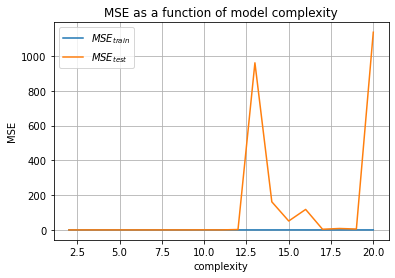

Part 2: perform a bias-variance tradeoff analysis 

Polynomial degree: 0
Error: 0.11226606850056169
Bias^2: 0.11226606850056169
Var: 3.0814879110195774e-33
0.11226606850056169 >= 0.11226606850056169 + 3.0814879110195774e-33 = 0.11226606850056169
Polynomial degree: 1
Error: 0.05136365468965304
Bias^2: 0.051363654689653
Var: 2.072541361403714e-32
0.05136365468965304 >= 0.051363654689653 + 2.072541361403714e-32 = 0.051363654689653
Polynomial degree: 2
Error: 0.0529004730555096
Bias^2: 0.052900473055509586
Var: 1.3144471870442885e-32
0.0529004730555096 >= 0.052900473055509586 + 1.3144471870442885e-32 = 0.052900473055509586
Polynomial degree: 3
Error: 0.06724842110644491
Bias^2: 0.06724842110644491
Var: 1.8460038516951655e-32
0.06724842110644491 >= 0.06724842110644491 + 1.8460038516951655e-32 = 0.06724842110644491
Polynomial degree: 4
Error: 0.044394044105969865
Bias^2: 0.044394044105969865
Var: 5.7007526353862184e-33
0.044394044105969865 >= 0.044394044105969865 + 5.7007526353862184e-33 = 0

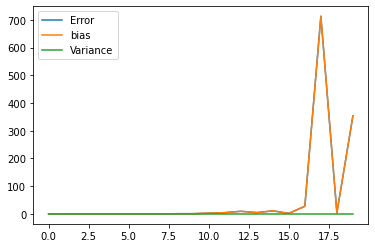

In [3]:
import numpy as np
from random import random, seed
#from linear_regression import plot_ols_complexity, create_xyz_dataset, bias_variance_complexity, Plot_FrankeFunction
import matplotlib.pyplot as plt

# Create vanilla dataset:
np.random.seed(2018)

# Datapoints (squared root of datapoints -> meshgrid)
n = 10
# Paramaters of noise distribution
mu_N = 0; sigma_N = 0.2
# Parameter of splitting data
test_size = 0.2

x,y,z = create_xyz_dataset(n,mu_N, sigma_N); z = z.ravel() #z.reshape(-1,1)
print(x.shape)

print("Part 1: $MSE_{train}$ and $MSE_{test}$ in function of the complexity of the model (degree-order of polynomial) \n")
complexity = np.arange(2,21)
plot_ols_complexity(x,y,z, complexity)

print("Part 2: perform a bias-variance tradeoff analysis \n")
complexity = np.arange(0,20)

n_boostraps=100

error = np.zeros(complexity.size)
bias = np.zeros(complexity.size)
variance = np.zeros(complexity.size)

for degree in range(complexity.size):
    X = create_X(x, y, degree)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
    
    z_pred_boot = np.empty((z_test.shape[0], n_boostraps))
    
    for i in range(n_boostraps):
        # Draw a sample of our dataset
        X_sample, z_sample = resample(X_train, z_train)
        # Perform OLS equation
        #model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
        beta, z_tilde, z_pred = OLS_solver(X_train, X_test, z_train, z_test)
        # Evaluate the new model on the same test data each time.
        z_pred_boot[:, i] = z_pred.ravel()
        #z_pred_boot[:, i] = model.fit(X_sample, z_sample).predict(X_test).ravel()
        
        
    error[degree] = np.mean( np.mean((z_test.reshape(-1,1) - z_pred_boot)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (z_test.reshape(-1,1) - np.mean(z_pred_boot, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(z_pred_boot, axis=1, keepdims=True) )
    
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.plot(complexity, error, label='Error')
plt.plot(complexity, bias, label='bias')
plt.plot(complexity, variance, label='Variance')
plt.legend()
plt.show()